In [245]:
import pandas as pd
import matplotlib.pyplot as plt

In [246]:
# Load the CSV file
file_path = 'resources/board_games.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Display the first few rows and the summary of the DataFrame
print(df.head())
print(df.info())

   game_id                                        description  \
0        1  Die Macher is a game about seven sequential po...   
1        2  Dragonmaster is a trick-taking card game based...   
2        3  Part of the Knizia tile-laying trilogy, Samura...   
3        4  When you see the triangular box and the luxuri...   
4        5  In Acquire, each player strategically invests ...   

                                          image  max_players  max_playtime  \
0   //cf.geekdo-images.com/images/pic159509.jpg            5           240   
1   //cf.geekdo-images.com/images/pic184174.jpg            4            30   
2  //cf.geekdo-images.com/images/pic3211873.jpg            4            60   
3   //cf.geekdo-images.com/images/pic285299.jpg            4            60   
4   //cf.geekdo-images.com/images/pic342163.jpg            6            90   

   min_age  min_players  min_playtime            name  playing_time  ...  \
0       14            3           240      Die Macher           

In [247]:
# Check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10532 entries, 0 to 10531
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   game_id         10532 non-null  int64  
 1   description     10532 non-null  object 
 2   image           10531 non-null  object 
 3   max_players     10532 non-null  int64  
 4   max_playtime    10532 non-null  int64  
 5   min_age         10532 non-null  int64  
 6   min_players     10532 non-null  int64  
 7   min_playtime    10532 non-null  int64  
 8   name            10532 non-null  object 
 9   playing_time    10532 non-null  int64  
 10  thumbnail       10531 non-null  object 
 11  year_published  10532 non-null  int64  
 12  artist          7759 non-null   object 
 13  category        10438 non-null  object 
 14  compilation     410 non-null    object 
 15  designer        10406 non-null  object 
 16  expansion       2752 non-null   object 
 17  family          7724 non-null  

In [248]:
# Check the shape of the DataFrame
df.shape

(10532, 22)

In [249]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

image              1
thumbnail          1
artist          2773
category          94
compilation    10122
designer         126
expansion       7780
family          2808
mechanic         950
publisher          3
dtype: int64


In [250]:
# Drop columns that are not needed or have excessive missing values
columns_to_drop = ['image', 'thumbnail', 'compilation', 'year_published', 'artist', 'designer']
df.drop(columns=columns_to_drop, inplace=True)

# Check the DataFrame to confirm the columns have been dropped
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10532 entries, 0 to 10531
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   game_id         10532 non-null  int64  
 1   description     10532 non-null  object 
 2   max_players     10532 non-null  int64  
 3   max_playtime    10532 non-null  int64  
 4   min_age         10532 non-null  int64  
 5   min_players     10532 non-null  int64  
 6   min_playtime    10532 non-null  int64  
 7   name            10532 non-null  object 
 8   playing_time    10532 non-null  int64  
 9   category        10438 non-null  object 
 10  expansion       2752 non-null   object 
 11  family          7724 non-null   object 
 12  mechanic        9582 non-null   object 
 13  publisher       10529 non-null  object 
 14  average_rating  10532 non-null  float64
 15  users_rated     10532 non-null  int64  
dtypes: float64(1), int64(8), object(7)
memory usage: 1.3+ MB
None


In [251]:
# Fill missing values in specific columns without using inplace
df['category'] = df['category'].fillna('Unknown')
df['expansion'] = df['expansion'].fillna('None')
df['family'] = df['family'].fillna('None')
df['mechanic'] = df['mechanic'].fillna('Unknown')
df['publisher'] = df['publisher'].fillna('Unknown')

# Verify if any missing values remain
remaining_missing_values = df.isnull().sum()
print(remaining_missing_values[remaining_missing_values > 0])

Series([], dtype: int64)


In [252]:
# Check the DataFrame again
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10532 entries, 0 to 10531
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   game_id         10532 non-null  int64  
 1   description     10532 non-null  object 
 2   max_players     10532 non-null  int64  
 3   max_playtime    10532 non-null  int64  
 4   min_age         10532 non-null  int64  
 5   min_players     10532 non-null  int64  
 6   min_playtime    10532 non-null  int64  
 7   name            10532 non-null  object 
 8   playing_time    10532 non-null  int64  
 9   category        10532 non-null  object 
 10  expansion       10532 non-null  object 
 11  family          10532 non-null  object 
 12  mechanic        10532 non-null  object 
 13  publisher       10532 non-null  object 
 14  average_rating  10532 non-null  float64
 15  users_rated     10532 non-null  int64  
dtypes: float64(1), int64(8), object(7)
memory usage: 1.3+ MB


In [253]:
df.shape

(10532, 16)

In [254]:


# First, we'll extract all unique values in the mechanic column
unique_mechanics = df['mechanic'].dropna().unique()

# Then, we can join them into a single string and find unique delimiters
mechanic_string = ', '.join(unique_mechanics)

# Display the unique delimiters
delimiters = set(mechanic_string)  # Using a set to find unique characters
print("Unique delimiters found in the mechanic column:", delimiters)


Unique delimiters found in the mechanic column: {'W', 'f', 'k', 'N', 'l', 'C', 'R', 's', 'v', 'h', 'r', 'M', 'T', 'U', 'I', 'o', '/', 'P', 'L', 'V', 'G', 'b', 'A', 'S', 'u', 'Y', 'p', 'H', 't', 'c', 'E', 'w', 'y', 'D', 'm', 'd', 'g', 'i', ' ', 'B', 'O', 'e', 'a', 'x', '-', ',', 'n'}


In [255]:
# Split the 'category' column by commas and get unique values
unique_genres = set(genre.strip() for sublist in df['category'].str.split(',') for genre in sublist)

# Save unique categories to a text file
with open('unique_categories.txt', 'w') as file:
    for genre in unique_genres:
        file.write(f"{genre}\n")

# Print the count of unique categories
print(f"Total Unique Categories: {len(unique_genres)}")

# Print unique categories in sorted order
print("Unique Categories (Sorted):")
for genre in sorted(unique_genres):
    print(genre)


Total Unique Categories: 84
Unique Categories (Sorted):
Abstract Strategy
Action / Dexterity
Adventure
Age of Reason
American Civil War
American Indian Wars
American Revolutionary War
American West
Ancient
Animals
Arabian
Aviation / Flight
Bluffing
Book
Card Game
Children's Game
City Building
Civil War
Civilization
Collectible Components
Comic Book / Strip
Deduction
Dice
Economic
Educational
Electronic
Environmental
Expansion for Base-game
Exploration
Fantasy
Farming
Fighting
Game System
Horror
Humor
Industry / Manufacturing
Korean War
Mafia
Math
Mature / Adult
Maze
Medical
Medieval
Memory
Miniatures
Modern Warfare
Movies / TV / Radio theme
Murder/Mystery
Music
Mythology
Napoleonic
Nautical
Negotiation
Novel-based
Number
Party Game
Pike and Shot
Pirates
Political
Post-Napoleonic
Prehistoric
Print & Play
Puzzle
Racing
Real-time
Religious
Renaissance
Science Fiction
Space Exploration
Spies/Secret Agents
Sports
Territory Building
Trains
Transportation
Travel
Trivia
Unknown
Video Game Them

making it binary


In [256]:
# # Step 2: Explode the DataFrame to create separate rows for each category
# df_exploded = df.explode('category')

# # Step 3: Use get_dummies to create separate columns for each category
# df_encoded = pd.get_dummies(df_exploded, columns=['category'], drop_first=True)

# # Optional: Group by game_id and aggregate the binary columns back to original format
# df_final = df_encoded.groupby('game_id').max().reset_index()

# # View the final DataFrame
# print(df_final)


In [257]:
# Count frequency of each category
category_counts = df['category'].str.split(',').explode().value_counts()

# Print the category counts
print("Category Frequencies:")
print(category_counts)


Category Frequencies:
category
Card Game                  2981
Wargame                    2034
Fantasy                    1218
Fighting                    900
Economic                    878
                           ... 
Pike and Shot                27
Game System                  22
American Indian Wars         15
Korean War                   14
Expansion for Base-game      11
Name: count, Length: 84, dtype: int64


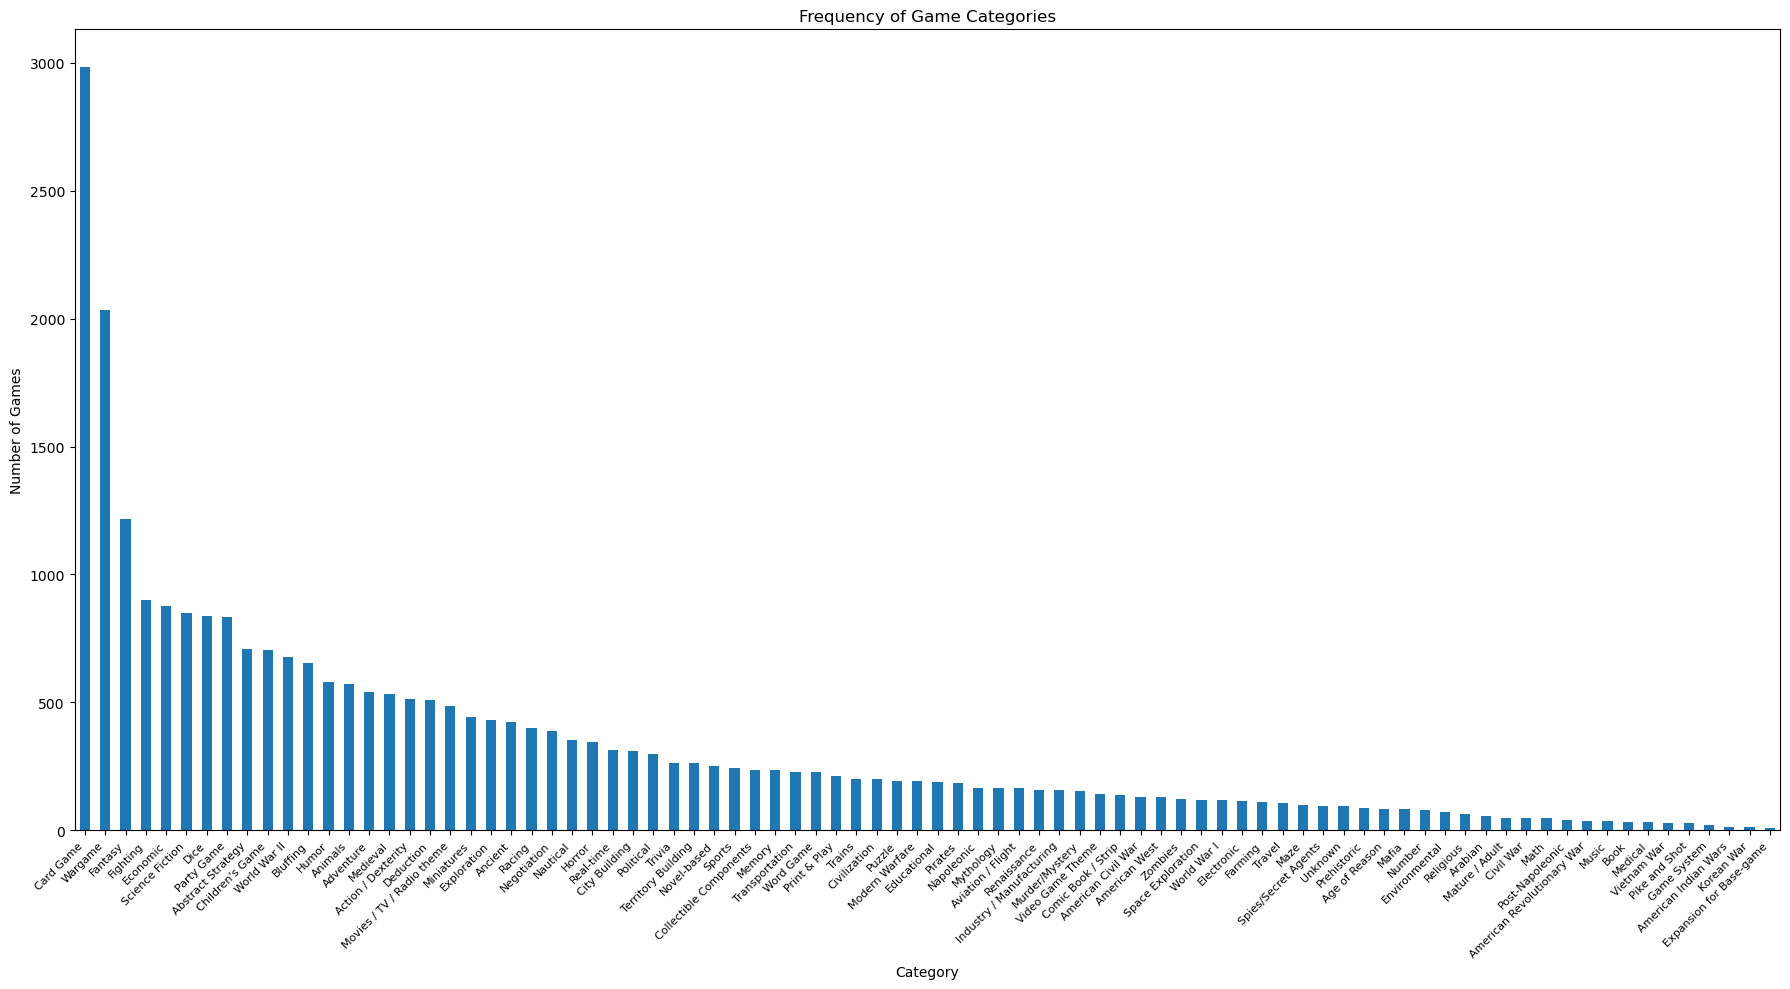

In [258]:
# Split the 'category' column by commas and get unique values
unique_genres = set(genre.strip() for sublist in df['category'].str.split(',') for genre in sublist)

# Count frequency of each category
category_counts = df['category'].str.split(',').explode().value_counts()

# Plot with increased figure size and smaller font size
plt.figure(figsize=(18, 10))  # Adjust width and height as needed
category_counts.plot(kind='bar')
plt.title('Frequency of Game Categories')
plt.xlabel('Category')
plt.ylabel('Number of Games')
plt.xticks(rotation=45, ha='right', fontsize=8)  # Smaller font size
plt.tight_layout()
plt.show()

In [259]:
# Print the total number of unique categories and some examples
print(f"Total Unique Categories: {len(category_dict)}")
print("Example Categories and Games:")
for category, games in list(category_dict.items())[:5]:  # Display first 5 categories
    print(f"{category}: {', '.join(games[:3])}...")  # Show only the first 3 games for brevity


Total Unique Categories: 84
Example Categories and Games:
Math: Picus, Executive Decision, Business Strategy...
City Building: Wacky Wacky West, Chinatown, Big City...
Music: Ever Green, Maestro, Battle of the Bands...
Ancient: Tal der Könige, Ra, Tigris & Euphrates...
Party Game: Apples to Apples, Pass the Bomb, PitchCar...
